This is the jupyter notebook based directly on the materials in Ch. 7.6.4 of the text "Python for Scientists" by J. Stewart. 

# Numerical Solution of SDEs
We look for a numerical solution (for $t \in [0,T]$) to the SDE $$dX(t) = a(X(t)) dt + b(X(t)) dW(t),$$ with $X(0) = X_{0}.$
We partition the t-interval into N equal subintervals of length $\Delta t = T/N$, set $t_{k} = k \Delta t$ for $k = 0, 1, \dots, N$ and abbreviate $X_{k} = X(t_{k})$.

Two popular numerical methods:


### (1) Euler-Mayurama Method
$$X_{k+1} = X_{k} + a(X_{k})\Delta t + b(X_{k})(W_{k+1} − W_{k}).$$

### (2) Milstein's Method
$$ X_{k+1} =X_{k} + a(X_{k})\Delta t + b(X_{k})(W_{k+1} − W_{k}) + b(X_{k}) \frac{db}{dX}(X_{k}) \int^{t_{k+1}}_{t_{k}} dW(s) \int^{s}_{t_{k}} dW(\tau).$$
Computing the double integral in the above gives the scheme:
$$X_{k+1} = X_{k} + a(X_{k}) \Delta t + b(X_{k})\Delta W_{k} + \frac{1}{2} b(X_{k})b'(X_{k})[(\Delta W_{k})^2 − \Delta t].$$

Note: Generalization to the SDE systems is not straightforward.


## Example 1: Geometric Brownian Motion
Consider the SDE $$dX(t) = \lambda X(t) dt + \mu X(t) dW(t),$$ with $X(0) = X_{0}.$
Its formal Ito solution is $$ X(t) = X_{0} \exp{\left(\left(\lambda - \frac{\mu^{2}}{2} \right) t + \mu W(t)\right)}.$$
We choose the parameter values $\mu = 1, \lambda = 2, X_{0} =1  $.

We implement the Milstein algorithm and compare it to the analytical solution. 

In [15]:
%matplotlib inline
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

In [16]:
# Set up grid
T=1.0
N=1000
t,dt=np.linspace(0,T,N+1,retstep=True)

In [17]:
# Get Brownian motion
dW=npr.normal(0.0, np.sqrt(dt),N+1)
dW[0]=0.0
W=np.cumsum(dW)

In [18]:
# Equation parameters and functions
lamda=2.0
mu=1.0
Xzero=1.0
def a(X): return lamda*X
def b(X): return mu*X
def bd(X): return mu*np.ones_like(X)

In [19]:
# Analytic solution
Xanal=Xzero*np.exp((lamda-0.5*mu*mu)*t+mu*W)

In [20]:
# Euler-Mayurama and Milstein solution
Xem=np.empty_like(t)
Xem[0]=Xzero
Xmil=np.empty_like(t)
Xmil[0]=Xzero
for n in range(N):
    Xem[n+1]= Xem[n]+dt*a(Xem[n]) + dW[n+1]*b(Xem[n])
    Xmil[n+1]=Xmil[n]+dt*a(Xmil[n]) + dW[n+1]*b(Xmil[n]) + 0.5*(b(Xmil[n])*bd(Xmil[n])*(dW[n+1]**2-dt))

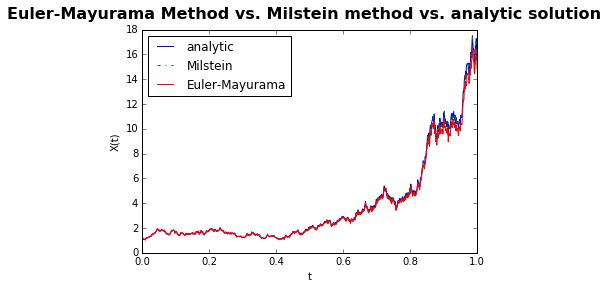

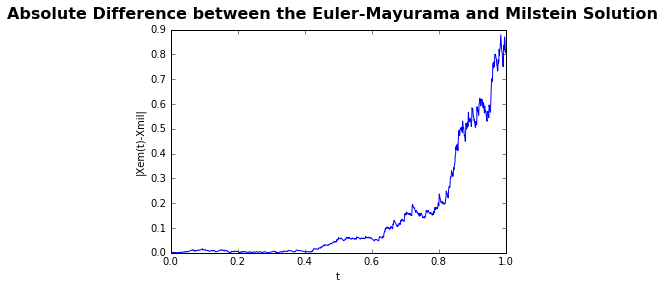

In [32]:
plt.ion()
plt.plot(t,Xanal,'b-',label='analytic')
plt.plot(t,Xmil,'g-.',label='Milstein')
plt.plot(t,Xem, 'r-',label='Euler-Mayurama')
plt.legend(loc='best')
plt.xlabel('t')
plt.ylabel('X(t)')
plt.suptitle('Euler-Mayurama Method vs. Milstein method vs. analytic solution', weight='bold',size=16)
plt.show(1)

plt.plot(t,abs(Xem-Xmil))
plt.xlabel('t')
plt.ylabel('|Xem(t)-Xmil|')
plt.suptitle('Absolute Difference between the Euler-Mayurama and Milstein Solution', weight='bold',size=16)
plt.show(2)

We have not discussed the convergence rate of the two numerical schemes. See the details in Stewart's text.